In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from psifr import fr
from cfr import task
from cfr import figures

cfr_dir = '/Users/morton/Dropbox/work/cmr_cfr/cfr'
fit_dir = os.path.join(cfr_dir, 'fits', 'v2', 'temp')
sim_file = os.path.join(fit_dir, 'sim.csv')
data_file = os.path.join(cfr_dir, 'cfr_eeg_mixed.csv')

In [2]:
data = task.read_free_recall(data_file)
sim = task.read_free_recall(sim_file)

In [6]:
full = pd.concat((data, sim), axis=0, keys=['Data', 'Model'])
full.index.rename(['source', 'trial'], inplace=True)

In [8]:
p = full.groupby('source').apply(fr.category_crp, category_key='category')

In [16]:
comp = p[['prob']].unstack(level=0).droplevel(axis=1, level=0)

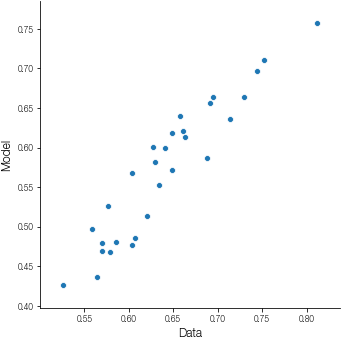

In [17]:
g = sns.relplot(kind='scatter', x='Data', y='Model', data=comp.reset_index())

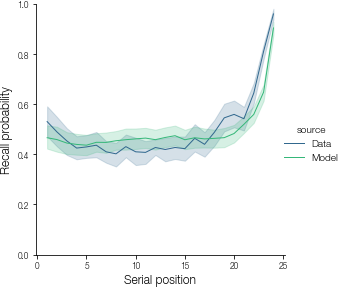

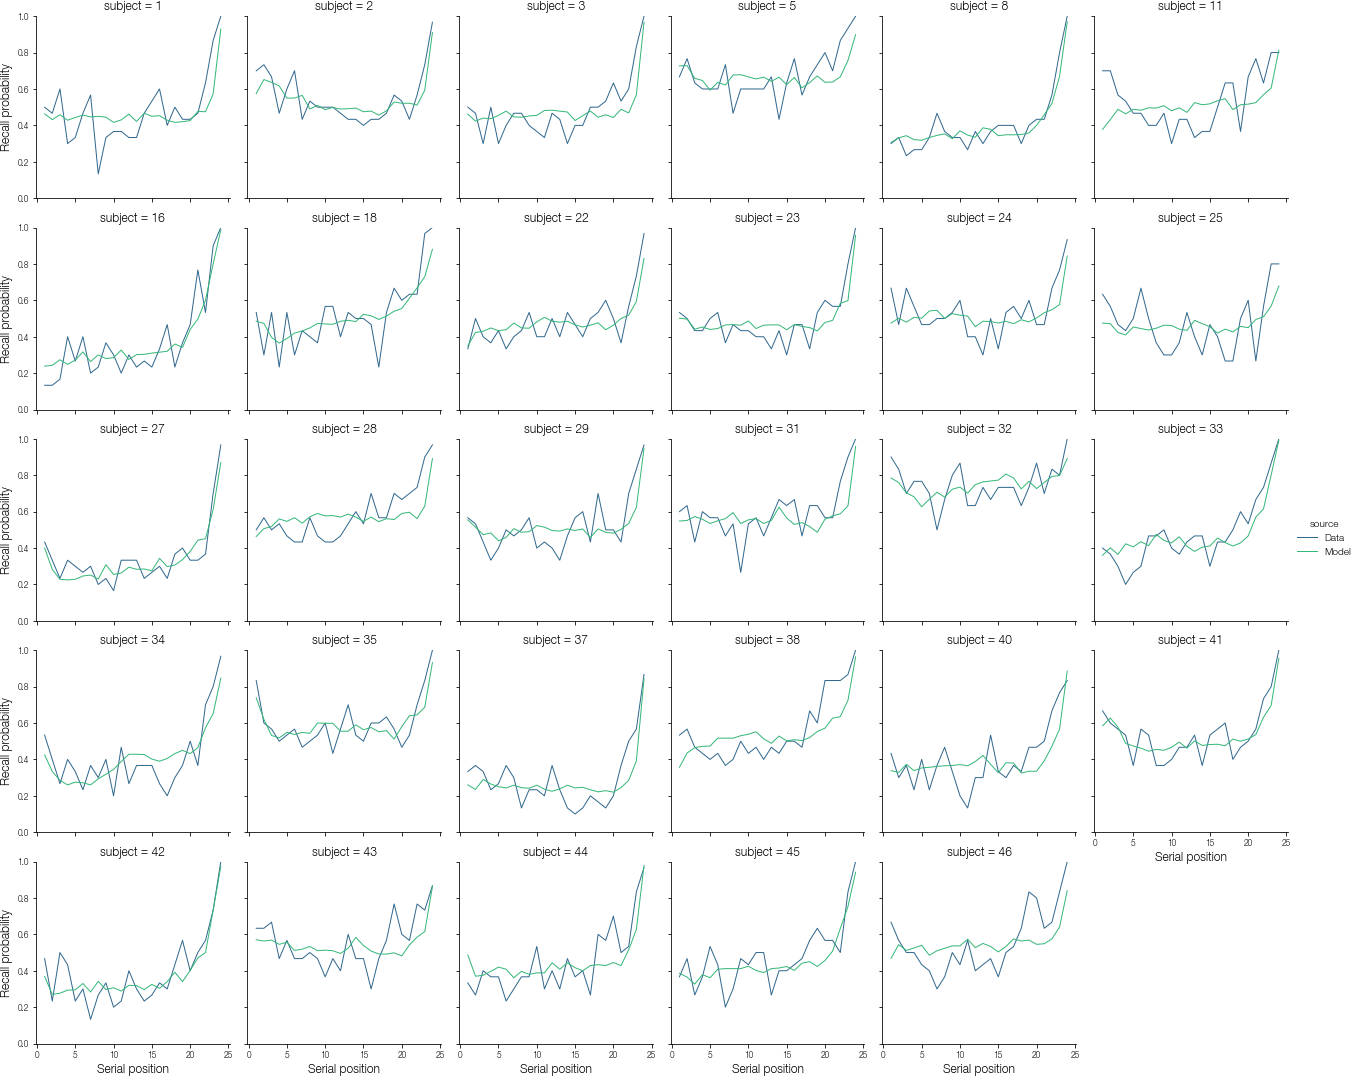

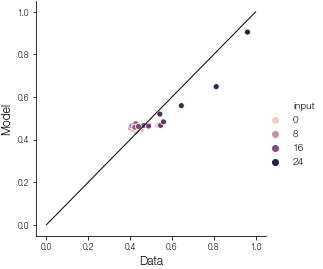

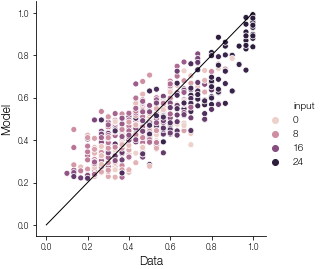

In [35]:
import importlib
importlib.reload(figures)
figures.plot_fit(full, 'source', 'spc', fr.spc, {}, fr.plot_spc, 
                 os.path.join(fit_dir, 'figs'))

In [12]:
p_rec = full.groupby('source').apply(fr.spc)
comp = p_rec.unstack(level=0).droplevel(axis=1, level=0)

In [20]:
p_rec

recall
source subject input          
data   1       1.0    0.500000
               2.0    0.466667
               3.0    0.600000
               4.0    0.300000
               5.0    0.333333
...                        ...
sim    46      20.0   0.545000
               21.0   0.548333
               22.0   0.575000
               23.0   0.640000
               24.0   0.840000

[1392 rows x 1 columns]

In [19]:
p_rec.index.levels[0]

Index(['data', 'sim'], dtype='object', name='source')

In [30]:
p_rec

recall
source subject input          
data   1       1.0    0.500000
               2.0    0.466667
               3.0    0.600000
               4.0    0.300000
               5.0    0.333333
...                        ...
sim    46      20.0   0.545000
               21.0   0.548333
               22.0   0.575000
               23.0   0.640000
               24.0   0.840000

[1392 rows x 1 columns]

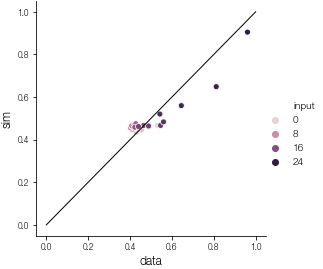

In [31]:
m = p_rec.groupby(['source', 'input']).mean()
df = m.unstack(level=0).droplevel(axis=1, level=0)
g = sns.relplot(kind='scatter', x='data', y='sim', hue='input',
                data=df.reset_index(), height=4)
g.axes[0, 0].plot([0, 1], [0, 1], '-k')

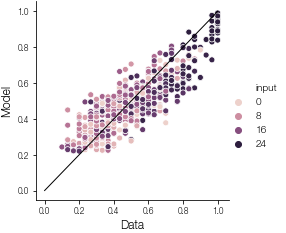

In [5]:
g = sns.relplot(kind='scatter', x='data', y='sim', hue='input', 
                data=comp.reset_index(), height=3.5);
g.axes[0, 0].plot([0, 1], [0, 1], '-k');
g.set(xlabel='Data', ylabel='Model');

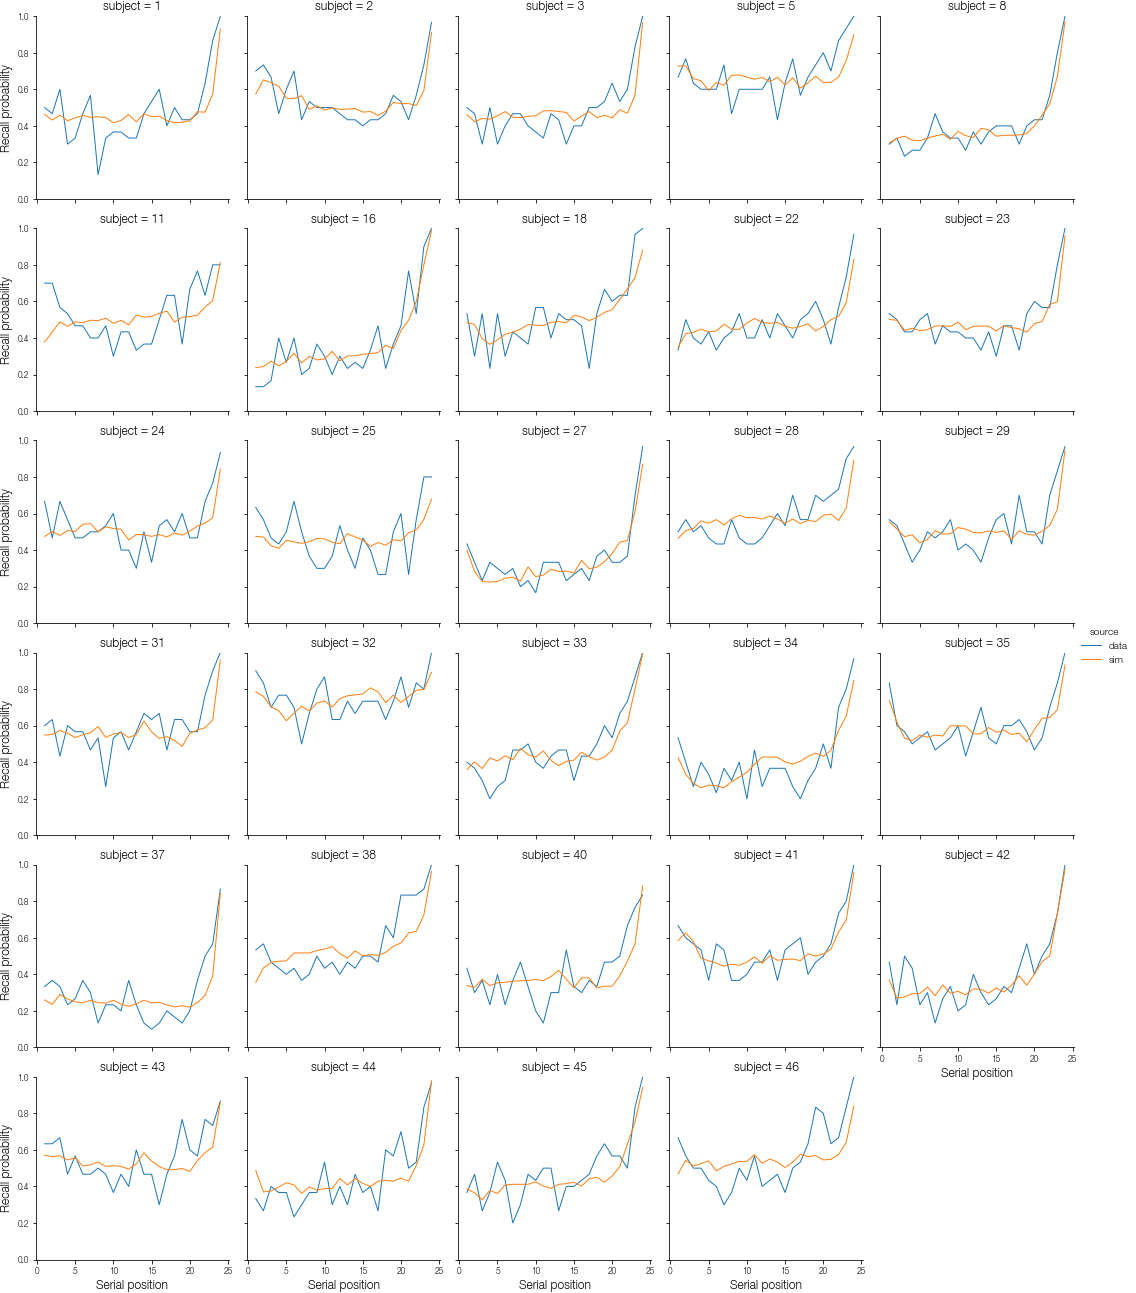

In [6]:
g = fr.plot_spc(p_rec, col='subject', col_wrap=5, hue='source');
g.add_legend();

In [2]:
data = pd.read_csv(data_file)
merged = fr.merge_free_recall(data)

In [5]:
study1 = fr.get_list(study, 1, 2)
recall1 = fr.get_list(recall, 1, 2)

In [16]:
sim1 = fr.get_list(data, 1, 2)
sim1

,subject,list,position,trial_type,item,item_index,session,list_type,category,response,response_time,list_category
0,1,2,1,study,SEAN PENN,228.0,1.0,mixed,cel,3.0,1.255,mixed
1,1,2,2,study,AUDREY HEPBURN,19.0,1.0,mixed,cel,3.0,1.040,mixed
2,1,2,3,study,ST PATRICKS CATHEDRAL,463.0,1.0,mixed,loc,2.0,1.164,mixed
3,1,2,4,study,LES INVALIDES,364.0,1.0,mixed,loc,2.0,0.829,mixed
4,1,2,5,study,GREAT ZIMBABWE RUINS,340.0,1.0,mixed,loc,3.0,0.872,mixed
5,1,2,6,study,BRYCE CANYON,281.0,1.0,mixed,loc,2.0,1.241,mixed
6,1,2,7,study,TROPHY,745.0,1.0,mixed,obj,3.0,0.862,mixed
7,1,2,8,study,BRUSH,548.0,1.0,mixed,obj,3.0,0.779,mixed
8,1,2,9,study,SUPREME COURT,469.0,1.0,mixed,loc,2.0,1.245,mixed
9,1,2,10,study,SAN FRANCISCO,444.0,1.0,mixed,loc,4.0,0.854,mixed


In [15]:
recall1

,subject,list,position,trial_type,item,item_index,session,list_type,category,response,response_time,list_category
24,1,2,1,recall,BRICK,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,1,2,2,recall,BRYCE CANYON,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,1,2,3,recall,SUPREME COURT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27,1,2,4,recall,GREAT ZIMBABWE RUINS,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,1,2,5,recall,SAN FRANCISCO,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,1,2,6,recall,CHAIR,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,1,2,7,recall,NICOLAS CAGE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31,1,2,8,recall,JULIA ROBERTS,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,1,2,9,recall,AUDREY HEPBURN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,1,2,10,recall,SEAN PENN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
fr.merge_lists(study1, recall1)

,subject,list,item,input,output,study,recall,repeat,intrusion
0,1,2,SEAN PENN,1,10.0,True,True,0,False
1,1,2,AUDREY HEPBURN,2,9.0,True,True,0,False
2,1,2,ST PATRICKS CATHEDRAL,3,NaN,True,False,0,False
3,1,2,LES INVALIDES,4,14.0,True,True,0,False
4,1,2,GREAT ZIMBABWE RUINS,5,4.0,True,True,0,False
5,1,2,BRYCE CANYON,6,2.0,True,True,0,False
6,1,2,TROPHY,7,NaN,True,False,0,False
7,1,2,BRUSH,8,NaN,True,False,0,False
8,1,2,SUPREME COURT,9,3.0,True,True,0,False
9,1,2,SAN FRANCISCO,10,5.0,True,True,0,False


In [8]:
study1 = study.loc[(study['subject'] == 1) & (study['list'] == 2)]
recall1 = recall.loc[(recall['subject'] == 1) & (recall['list'] == 2)]

In [5]:
merged.loc[(merged['subject'] == 1) & (merged['list'] == 2)]

,subject,list,item,input,output,study,recall,repeat,intrusion,session,list_type,list_category,category,block,n_block,block_pos,block_len
0,1,2,SEAN PENN,1.0,NaN,True,False,0,False,1.0,mixed,mixed,cel,1.0,6.0,1.0,2.0
1,1,2,AUDREY HEPBURN,2.0,NaN,True,False,0,False,1.0,mixed,mixed,cel,1.0,6.0,2.0,2.0
2,1,2,ST PATRICKS CATHEDRAL,3.0,NaN,True,False,0,False,1.0,mixed,mixed,loc,2.0,6.0,1.0,4.0
3,1,2,LES INVALIDES,4.0,NaN,True,False,0,False,1.0,mixed,mixed,loc,2.0,6.0,2.0,4.0
4,1,2,GREAT ZIMBABWE RUINS,5.0,NaN,True,False,0,False,1.0,mixed,mixed,loc,2.0,6.0,3.0,4.0
5,1,2,BRYCE CANYON,6.0,NaN,True,False,0,False,1.0,mixed,mixed,loc,2.0,6.0,4.0,4.0
6,1,2,TROPHY,7.0,NaN,True,False,0,False,1.0,mixed,mixed,obj,3.0,6.0,1.0,2.0
7,1,2,BRUSH,8.0,NaN,True,False,0,False,1.0,mixed,mixed,obj,3.0,6.0,2.0,2.0
8,1,2,SUPREME COURT,9.0,NaN,True,False,0,False,1.0,mixed,mixed,loc,4.0,6.0,1.0,4.0
9,1,2,SAN FRANCISCO,10.0,NaN,True,False,0,False,1.0,mixed,mixed,loc,4.0,6.0,2.0,4.0


In [2]:
data = task.read_free_recall(data_file)
sim = task.read_free_recall(sim_file)

> /Users/morton/PycharmProjects/cmr_cfr/src/cfr/task.py(66)read_free_recall()
-> return merged


(Pdb)  c


> /Users/morton/PycharmProjects/cmr_cfr/src/cfr/task.py(66)read_free_recall()
-> return merged


(Pdb)  l


 61  	            list_keys += [field]
 62  	    study_keys = ['category', 'block', 'n_block', 'block_pos', 'block_len']
 63  	    merged = fr.merge_lists(study, recall, list_keys=list_keys,
 64  	                            study_keys=study_keys)
 65  	    breakpoint()
 66  ->	    return merged
 67  	
 68  	
 69  	def unpack_array(x):
 70  	    if isinstance(x, np.ndarray):
 71  	        x = unpack_array(x[0])


(Pdb)  p study


       subject  list  position trial_type                   item  item_index  \
0            1     2         1      study              SEAN PENN       228.0   
1            1     2         2      study         AUDREY HEPBURN        19.0   
2            1     2         3      study  ST PATRICKS CATHEDRAL       463.0   
3            1     2         4      study          LES INVALIDES       364.0   
4            1     2         5      study   GREAT ZIMBABWE RUINS       340.0   
...        ...   ...       ...        ...                    ...         ...   
20875       46    48        20      study             WILL SMITH       253.0   
20876       46    48        21      study                  SPORK       717.0   
20877       46    48        22      study                INHALER       615.0   
20878       46    48        23      study                  STAMP       719.0   
20879       46    48        24      study                 PEPPER       669.0   

       session list_type category  resp

(Pdb)  p recall


       subject  list  position trial_type                  item  item_index  \
24           1     2         1     recall                 BRICK         NaN   
25           1     2         2     recall          BRYCE CANYON         NaN   
26           1     2         3     recall         SUPREME COURT         NaN   
27           1     2         4     recall  GREAT ZIMBABWE RUINS         NaN   
28           1     2         5     recall         SAN FRANCISCO         NaN   
...        ...   ...       ...        ...                   ...         ...   
31090       46    48        11     recall                 SPORK         NaN   
31091       46    48        12     recall               INHALER         NaN   
31092       46    48        13     recall                 STAMP         NaN   
31093       46    48        14     recall               MAILBOX         NaN   
31094       46    48        15     recall       BARCODE SCANNER         NaN   

       session list_type category  response  respon

(Pdb)  p recall.loc[24, 'item']


'BRICK'


(Pdb)  p study.loc[23, 'item']


'BRICK'


(Pdb)  p list_keys


['session', 'list_type', 'list_category']


(Pdb)  p study_keys


['category', 'block', 'n_block', 'block_pos', 'block_len']


(Pdb)  q


BdbQuit: 

In [13]:
raw = pd.read_csv(sim_file)
study = raw.loc[raw['trial_type'] == 'study'].copy()
recall = raw.loc[raw['trial_type'] == 'recall'].copy()
merged = fr.merge_free_recall(study, recall)

TypeError: merge_free_recall() takes 1 positional argument but 2 were given

In [15]:
merged = fr.merge_free_recall(raw)
merged.loc[(merged['subject'] == 1) & (merged['list'] == 2)]

,subject,list,item,input,output,study,recall,repeat,intrusion
0,1,2,SEAN PENN,1,10.0,True,True,0,False
1,1,2,AUDREY HEPBURN,2,9.0,True,True,0,False
2,1,2,ST PATRICKS CATHEDRAL,3,NaN,True,False,0,False
3,1,2,LES INVALIDES,4,14.0,True,True,0,False
4,1,2,GREAT ZIMBABWE RUINS,5,4.0,True,True,0,False
5,1,2,BRYCE CANYON,6,2.0,True,True,0,False
6,1,2,TROPHY,7,NaN,True,False,0,False
7,1,2,BRUSH,8,NaN,True,False,0,False
8,1,2,SUPREME COURT,9,3.0,True,True,0,False
9,1,2,SAN FRANCISCO,10,5.0,True,True,0,False
